# Test di verifica d'ipotesi - Fisher

Il test di verifica di un'ipotesi di Fisher si ispira al principio di falsificabilità di Popper, e può essere riassunto nei seguenti passaggi:
1. formulazione di un'ipotesi falsificabile, definita **ipotesi nulla** $\text{H}_0$, da verificare e che viene ritenuta vera fino a prova contraria
2. scelta di una variabile esplicativa, o **statistica test**, $x$, un parametro disponibile, rilevante per il fenomeno indagato e di cui è nota - o approssimabile, sotto ipotesi ragionevoli sul fenomeno - la distribuzione di probabilità,
   $$p(x|\text{H}_0)$$
3. scelta del **test statistico** (es. una coda o due code,...), in base anche alle caratteristiche del fenomeno indagato
4. scelta del **livello di significatività**, $\alpha$, del test; il valore del livello di significatività traduce "il livello di evidenza richiesto" per falsificare l'ipotesi e - insieme alle caratteristiche del fenomeno e del test - determina le *regioni di rifiuto e di accettazione dell'ipotesi*, gli intervalli di valori della statistica test $x$ che determinano se l'ipotesi è stata falsificata o meno;
5. raccolta dati e **calcolo statistica test sul campione**
6. **confronto** del valore calcolato della statistica test con gli intervalli di rifiuto e accettazione della variabile soggetta all'ipotesi nulla, e **verdetto sull'ipotesi**



## Esempio: moneta truccata o no?
Dati i risultati di $n$ lanci di una moneta, si vuole stabilire con una certa probabilità se la moneta è truccata o meno.

Il lancio di una moneta viene modellato come una variabile casuale $X$ di Bernoulli, con due possibili uscite testa, $X=0$, o croce, $X=1$. La forma generale della distribuzione di probabilità di una variabile casuale di Bernoulli $B(p)$ è

$$p(X) = \begin{cases} p & , \quad X = H:\text{Head} \\ 1-p & , \quad X = T:\text{Tail} \end{cases} \ ,$$

essendo $p \in [0,1]$ la probabilità associata al valore $X=H$ e $1-p$ quella associata al valore $X=T$.

Per la verifica dell'ipotesi si organizza una campagna sperimentale di $n$ lanci e si sceglie come **statistica test** $x$ il numero di volte che il risultato del lancio è testa, $X=H$.
Per una variabile casuale con distribuzione di probabilità di Bernoulli $B(p)$, il numero $x$ di risultati $X=H$ in $n$ ripetizioni indipendenti dell'evento è a sua volta una variabile casuale, con distribuzione di probabilità binomiale $\mathscr{B}(n,p)$

$$p_n(x) = \left( \begin{matrix} n \\ x \end{matrix}  \right) \, p^x \, (1-p)^{n-x}$$

### Import librerie

In [180]:
# import libraries
%reset -f
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt


### Campione generato dal processo casuale
Viene lanciata una moneta $n_{flips}$ volte. Dati

In [218]:
#> Random process of interest, unknown execpt for the sample.
p_head = .5
p_tail = 1. - p_head

# Coin flip as a Bernoulli probability with outcomes: a = [0, 1] with prob p = [p_head, p_tail]
flip_rng = np.random.default_rng(42).choice
n_flips = 30
flip_params = { 'a': [0,1], 'p': [p_head, p_tail], 'size': n_flips }

#> Running coin flip experiment
ov = flip_rng(**flip_params)

coin_dict = [ 'head', 'tail']
# print([ coin_dict[o] for o in ov])
print("\n> Experiment")
print(f"n.samples: {n_flips}")
print(f"heads:tails {np.sum(ov)}:{n_flips - np.sum(ov)}")
print()



> Experiment
n.samples: 30
heads:tails 17:13



In [219]:
# ! Approach for low-dimensional problems, with no memory or performance issues

#> Null hypotesis, H0: the coin is fair
# The outcome of a single flip is a r.v. distributed like a Bernoulli variable with p_head = .5
# Every flip is statistically independent from the other
ixv = np.arange(n_flips+1)
xv = ixv / n_flips

#> Test statistics: average n.of heads in flip_n samples
# H0 hypotesis implies that the outcome of flip_n is a r.v. with Binomial pdf
x_H0_fv = sp.stats.binom.pmf(ixv, n_flips, p_head)

#> Test characteristics: symmetric
test_type = 'value'  # 'symmetric', 'right', 'left', 'value'

#> Significance level, alpha = .05 ("default")
alpha = .05


In [220]:
#> Acceptance and rejection regions, for discrete pdf
# Starting from the value of the test statistics x_max = max(x_H0_fv), expand 

def find_acceptance_region(p, alpha, test_type='value'):
    """ Find acceptance region for a discrete pdf, supposed to be unimodal """
    ix_max = np.argmax(p)
    nx = len(p)
    threshold = 1. - alpha

    # Initialization
    p_acc, ixl, ixr = p[ix_max], ix_max, ix_max
    
    # if ( test_type == 'value' ):
    while ( p_acc < threshold ):
        if ( p[ixl-1] >= p[ixr+1] ):
            ixl -= 1;  p_acc += p[ixl]
        else:
            ixr += 1;  p_acc += p[ixr]

    # else:
    return ixl, ixr


In [221]:
#> Compute acceptance region
ixl, ixr = find_acceptance_region(x_H0_fv, alpha,)

#> Evaluate test statistics on the samples
ixs = np.sum(ov)
xs  = ixs / n_flips


H0 accepted


<BarContainer object of 1 artists>

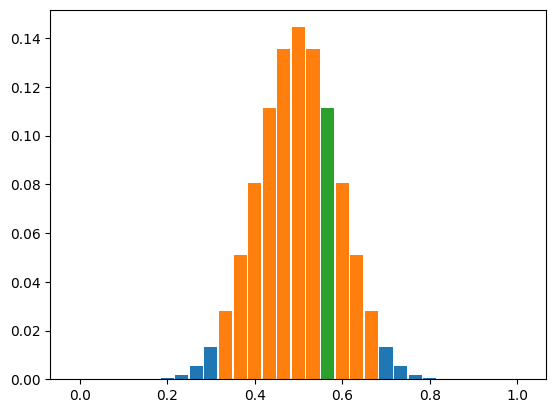

In [223]:
# Compare test statistics on the samples with the acceptance region
if ( ixl <= ixs <= ixr ):
    print("H0 accepted")
else:
    print("H0 rejected")

ix_acc = np.arange(ixl, ixr+1)
x_acc = xv[ix_acc]

dx_bar = (xv[1] - xv[0])*.90
plt.figure()
plt.bar(   xv, x_H0_fv        , width=dx_bar)
plt.bar(x_acc, x_H0_fv[ix_acc], width=dx_bar)
plt.bar(   xs, x_H0_fv[ixs]   , width=dx_bar)

# print(xv)